# 03. Regression

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, cross_validation
import pandas as pd

%matplotlib inline
plt.style.use("ggplot")

### Diabetes data
Scikit Learn 내장 데이터  
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html  
참고 : http://scikit-learn.org/stable/modules/linear_model.html

In [96]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [92]:
diabetes_df = pd.DataFrame(np.append(diabetes.data, diabetes.target[:, np.newaxis], 1))
diabetes_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128de3940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12c10c400>]], dtype=object)

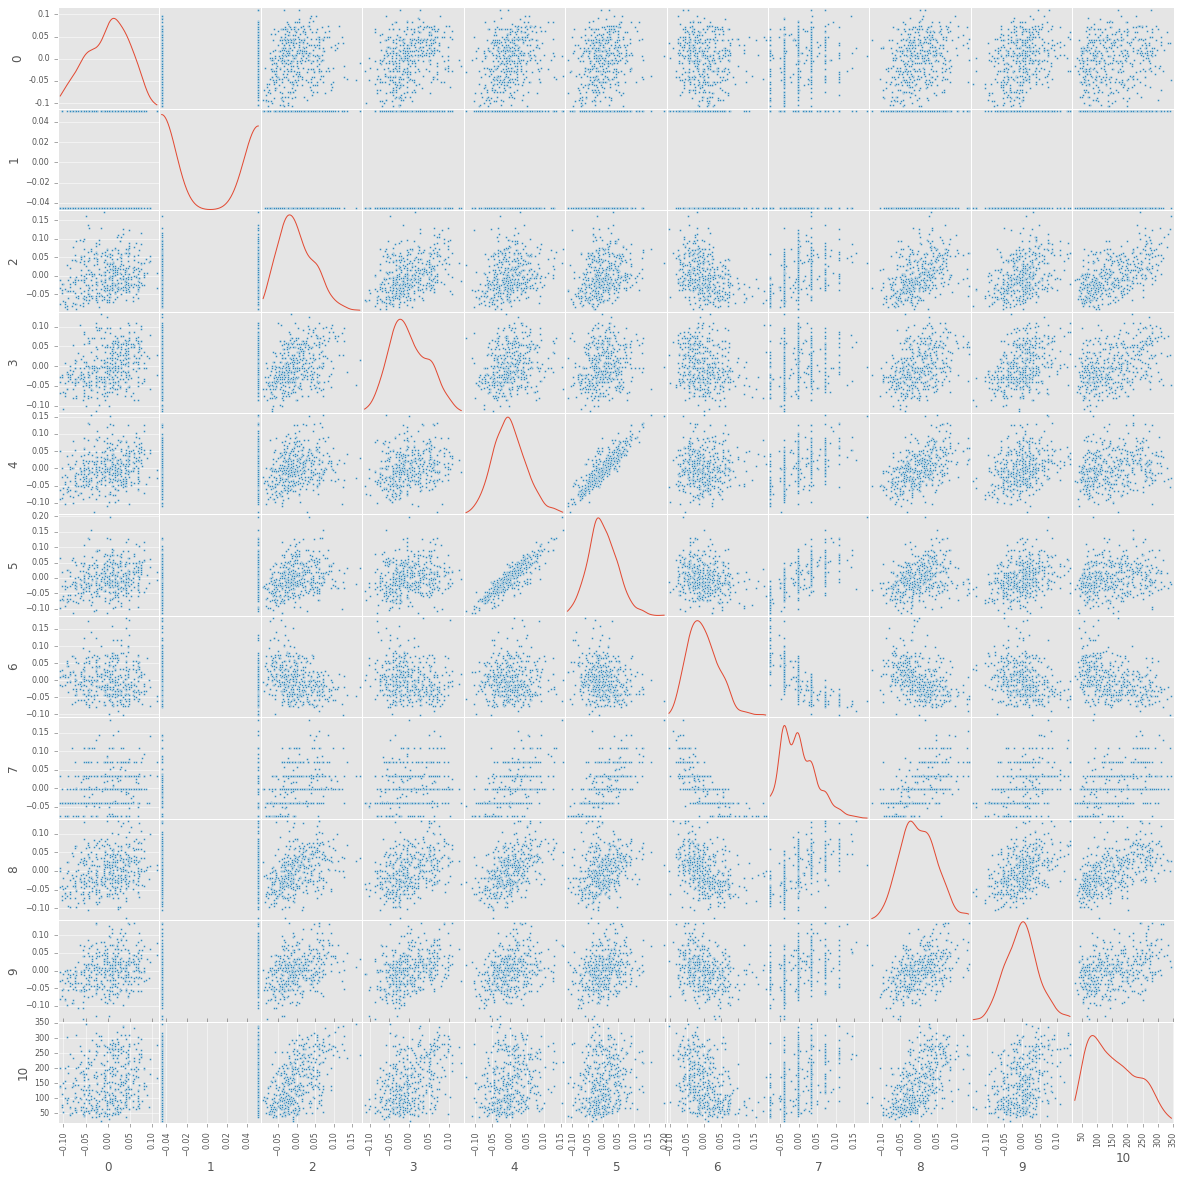

In [93]:
pd.tools.plotting.scatter_matrix(diabetes_df, alpha=1, figsize=(20, 20), diagonal='kde')

In [66]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [45]:
# np.newaxis
diabetes_X.shape, diabetes.data[:, 2].shape

((442, 1), (442,))

In [100]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [101]:
diabetes_X_train.shape, diabetes_X_test.shape

((422, 1), (20, 1))

In [102]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [103]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
# The coefficients and the intercept
print('Intercept\t Coefficients \n', regr.intercept_, "\t", regr.coef_)
# The mean square error
print("\n")
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Intercept	 Coefficients 
 152.918861826 	 [ 938.23786125]


Residual sum of squares: 2548.07
Variance score: 0.47


##### Plot outputs

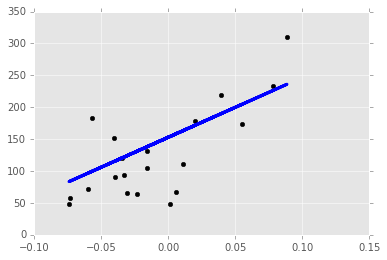

In [119]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

##### Train/Test split

In [140]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(diabetes.data, diabetes.target, test_size=0.05)

In [141]:
X_train.shape, X_test.shape

((419, 10), (23, 10))

##### K-fold Cross Validation

In [159]:
kf = cross_validation.KFold(30, n_folds=5, shuffle=True)

In [160]:
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  8  9 11 13 14 16 17 19 20 21 23 24 25 26 27 28 29] TEST: [ 7 10 12 15 18 22]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 16 17 18 19 21 22 23 24 26 29] TEST: [ 6 11 20 25 27 28]
TRAIN: [ 0  1  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 22 24 25 27 28 29] TEST: [ 2  3 19 21 23 26]
TRAIN: [ 1  2  3  6  7 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29] TEST: [ 0  4  5  8  9 14]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 14 15 18 19 20 21 22 23 25 26 27 28] TEST: [ 1 13 16 17 24 29]


In [167]:
kf = cross_validation.KFold(diabetes.data.shape[0], n_folds=5, shuffle=True)
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  19  22
  24  25  27  28  30  31  32  33  34  35  36  39  43  44  45  46  47  48
  49  50  51  53  54  55  56  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  82  83  84  85  86  89
  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 107 108 109
 110 111 112 113 114 115 116 118 121 122 123 124 126 128 129 130 133 134
 135 136 138 139 140 141 142 143 144 146 147 148 149 150 151 152 154 155
 156 157 160 161 162 163 164 166 167 168 169 170 171 174 175 177 178 179
 180 182 183 184 185 186 187 188 189 190 192 193 194 195 196 197 198 199
 200 201 202 203 204 206 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 223 224 225 226 230 231 232 233 234 235 236 237 238 239 240 242
 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260 262
 263 265 266 267 270 271 273 274 275 278 279 280 282 283 284 287 288 291
 292 293 294 295 296 297 298 300 301 302 303

##### LOOCV

In [171]:
loo = cross_validation.LeaveOneOut(10)

In [172]:
for train_index, test_index in loo:
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print(X_train, X_test, y_train, y_test)

TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


### Housing data
http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

In [12]:
housing = pd.read_csv("housing.csv")
# pd.DataFrame.from_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep=' ')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1212dd2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124f0e780>]], dtype=object)

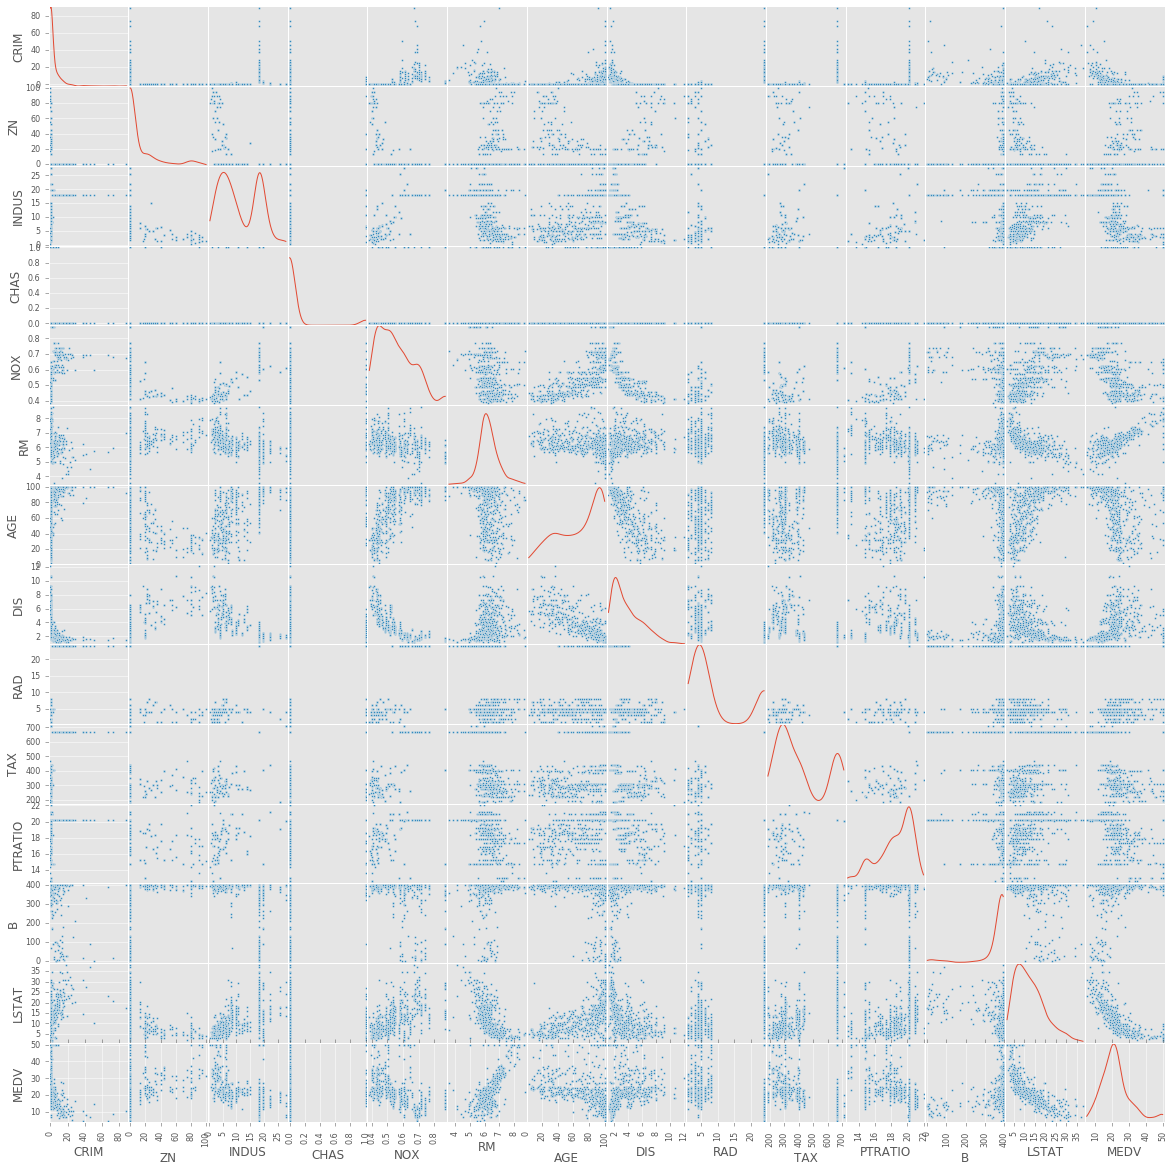

In [14]:
pd.tools.plotting.scatter_matrix(housing, alpha=1, figsize=(20, 20), diagonal='kde')